Power_divergenceResult(statistic=np.float64(-12.725252737654966), pvalue=np.float64(1.0))


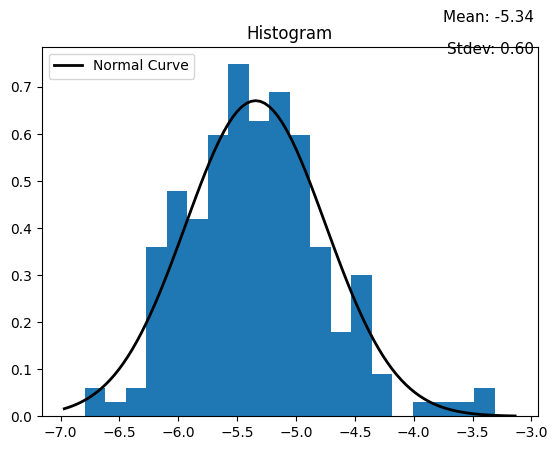

In [6]:
import matplotlib.pyplot as plt
import argparse
import numpy as np 
from scipy.stats import norm
import scipy.stats
import pandas as pd

filename = "affinities.csv"

# Optional filename parser
# parser = argparse.ArgumentParser(prog='data_file', description='Get data file for visualization')
# parser.add_argument('file',help='name of data file')
# args = parser.parse_args()
# df = pd.read_csv(args.file)

# Read files from csv
df = pd.read_csv(filename)
affinities = df.iloc[:, 2]

# For alternate file types
# output = open(args.file, 'r')
# lines = output.readlines()
# frequencies = []
# for line in lines[1:]:
#     elements = line.split(',')
#     frequencies.append(float(elements[2]))

# Plot histogram and data summary    
mu, std = norm.fit(affinities)

plt.hist(affinities, bins=20, density=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std) 

# Calculate chi square value
print(scipy.stats.chisquare(affinities))

# Histogram formatting 
plt.plot(x, p, 'k', linewidth=2)
plt.title("Histogram")
plt.legend(["Normal Curve"])
plt.text(0.95 * xmax, 1.25 * max(p), f'Mean: {mu:.2f}', color='black', fontsize=11, ha='right')
plt.text(0.95 * xmax, 1.15 * max(p), f'Stdev: {std:.2f}', color='black', fontsize=11, ha='right')
plt.show()

In [28]:
# Calculate z score of different data set based on previous data
new_file = filename
df2 = pd.read_csv(new_file)
new_affinities = df2.iloc[:, 1]
z_scores = []
for score in new_affinities:
    z_scores.append((score - mu) / std)
aff_prob = norm.cdf(z_scores)

# Create new csv with z-score values
df2["Z-score"] = z_scores
df2.to_csv("Affinity_with_z_score",index=False)